In [ ]:
# import the required libraries
# like matplotlib for plotting images and mtcnn for detection of face from the image

In [2]:
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# reading/taking an image for snapchat filters
# then converting it into RGB format and displaying it

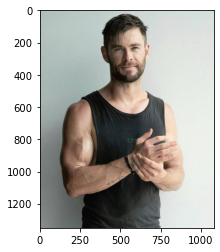

In [4]:
image = cv2.imread("chris hems img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
# taking a sunglasses png format image as filters
# then again changing the image into four channel RGBA format and displaying it

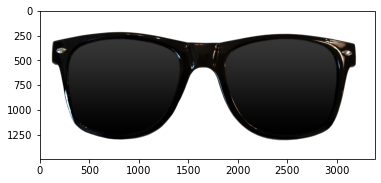

In [6]:
glasses = cv2.imread("sunglasses.png", -1)
glasses = cv2.cvtColor(glasses, cv2.COLOR_BGRA2RGBA)
plt.imshow(glasses)

In [7]:
# using mtcnn for detecting faces in the image

In [8]:
mtcnn = MTCNN()

In [9]:
# getting the coordinates for different parts of faces present in image like eyes, mouth, etc.

In [10]:
faces = mtcnn.detect_faces(image)
faces

[{'box': [431, 122, 220, 301],
  'confidence': 0.9999990463256836,
  'keypoints': {'left_eye': (489, 243),
   'right_eye': (590, 234),
   'nose': (545, 305),
   'mouth_left': (504, 356),
   'mouth_right': (594, 349)}}]

In [11]:
# taking the coordinate values for the first face in image
# since we have a single face in image so we got the same coordinates

In [12]:
face = faces[0]
face

{'box': [431, 122, 220, 301],
 'confidence': 0.9999990463256836,
 'keypoints': {'left_eye': (489, 243),
  'right_eye': (590, 234),
  'nose': (545, 305),
  'mouth_left': (504, 356),
  'mouth_right': (594, 349)}}

In [13]:
# taking the values of box and copied the image into temp variable
# then drawing a rectangle using X, Y axes 
# and then displaying the face with boundary box

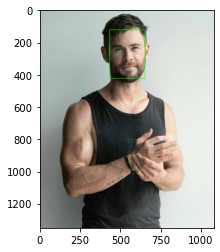

In [14]:
x, y, w, h = face['box']

temp_img = np.copy(image)

temp_img = cv2.rectangle(temp_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(temp_img)

In [15]:
# getting the proper coordinates for eyes to put our filters 
# in the first tuple we are getting the values for left eye and in second tuple we are getting the values of right eye
# then getting the height (h) and width (w) using x1, y1, x2, y2 coordinates to fit our sunglasses
# and now using for loop we are superimposing the image with the help of 3 channels (RGB) 
# displaying the snapchat filters image finally

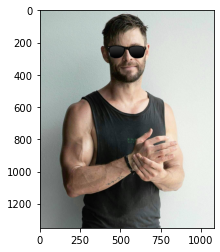

In [16]:
background = np.copy(image)
img_filter = np.copy(glasses)

(x1, y1) , (x2, y2) = (face['keypoints']['left_eye'], face['keypoints']['right_eye'])

x1 -= 80
y1 -= 40
x2 += 85
y2 += 80

h = y2-y1
w = x2-x1

img_filter = cv2.resize(img_filter, (w, h))

alpha_filter = img_filter[:, :, 3] / 255.0
alpha_background = 1.0 -alpha_filter

for c in range(0, 3):
    background[y1:y2, x1:x2, c] = (alpha_filter * img_filter[:, :, c] +
                                  alpha_background * background[y1:y2, x1:x2, c])
    

plt.imsave("ImageWithGoggles.png", background)
plt.imshow(background)

In [17]:
# now displaying both the images the original one and the image with snapchat filters

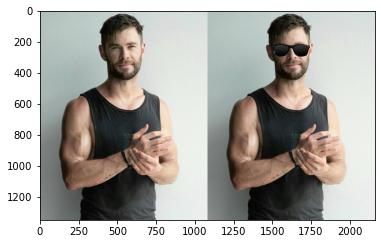

In [19]:
snapchat_filter = np.hstack((image, background))

plt.imsave("Snapchat_Filtered.png", snapchat_filter)
plt.imshow(snapchat_filter)